### before
├── images
│   └── test_image.png
│   └── test_image2.png
├── maskGen_json.json
└── maskGen.py

### after
├── images
│   └── test_image.png
│   └── test_image2.png
├── masks
│   └── test_image
│         └── test_image-1.png
│         └── test_image-2.png
│   └── test_image2
│         └── test_image2-1.png
│         └── test_image2-2.png
├── maskGen_json.json
└── maskGen.py

In [2]:
import os
import cv2
import json
import matplotlib.pyplot as plt
import numpy as np

def create_seperate_mask_img(json_file_name) :
    # 현재 디렉토리에서 가능!
    # 위의 before 구조에 맞게 저장되어있어야함.
    ## 구조는 마크다운 셀 더블클릭해야 제대로 보임
    source_folder = os.path.join(os.getcwd(), "train_images")
    json_path = json_file_name                     # Relative to root directory
    count = 0                                           # Count of total images saved
    file_bbs = {}                                       # Dictionary containing polygon coordinates for mask
    file_names_dict = {}
    file_names = []
    # Read JSON file
    with open(json_path) as f:
      data = json.load(f)

    # Extract X and Y coordinates if available and update dictionary
    # json 딕셔너리에서 x, y 좌표 추출
    def add_to_dict(data, itr, key, count, file_name):
        # data : json, itr : 이미지 이름, key : mask 이름, count : mask index
        try:
            x_points = data[itr]["regions"][str(count)]["shape_attributes"]["all_points_x"]
            y_points = data[itr]["regions"][str(count)]["shape_attributes"]["all_points_y"]
        except:
            print("No BB. Skipping", key)
            return

        all_points = []
        for i, x in enumerate(x_points):
            all_points.append([x, y_points[i]])

        file_bbs[key] = all_points
        file_names_dict[key] = file_name
        # file_bbs = {image이름-mask이름 : [x points, y points]}

    ## Json 파일에서 x,y points를 뽑아 file_bbs 에 저장.
    for itr in data:
        file_name_json = data[itr]["filename"]
        file_names.append(file_name_json)
        sub_count = 0
        # Contains count of masks for a single ground truth image

        if len(data[itr]["regions"]) > 1: # 마스크의 개수가 여러개
            for _ in range(len(data[itr]["regions"])):
                key = file_name_json[:-4] + "-" + str(sub_count+1)
                add_to_dict(data, itr, key, sub_count, file_name_json)
                sub_count += 1
        else: # 마스크 개수가 1개
            add_to_dict(data, itr, file_name_json[:-4], 0, file_name_json)

    print("\nDict size: ", len(file_bbs))

    ########## 경로 생성
    mask_folder = os.path.join(os.getcwd(), "masks")
    try :
        os.mkdir(mask_folder)
    except :
        print('mask folder already exist')
    for f in file_names :
        try :
            os.mkdir(os.path.join(mask_folder, f[:-4]))
        except :
            print('folder already exist')

    ######### 마스크 저장
    for itr in file_bbs:
        num_masks = itr.split("-")
        save_directory = os.path.join(mask_folder, file_names_dict[itr][:-4])
         # Dimensions should match those of ground truth image
        img = cv2.imread(source_folder+'/'+file_names_dict[itr])
        MASK_WIDTH = img.shape[0]
        MASK_HEIGHT =  img.shape[1]
        mask = np.zeros((MASK_WIDTH, MASK_HEIGHT))
        try:
            arr = np.array(file_bbs[itr])
        except:
            print("Not found:", itr)
            continue
        count += 1

        cv2.fillPoly(mask, [arr], color=(255))

        if len(num_masks) > 1:
            cv2.imwrite(os.path.join(save_directory, itr + ".png") , mask)
        else:
            cv2.imwrite(os.path.join(save_directory, itr + ".png") , mask)

    print("Images saved:", count)

In [3]:
# 마스크들 하나로 합치기
import os
import cv2
import json
import matplotlib.pyplot as plt
import numpy as np
import shutil
import glob

def merge_masks() :
    # 현재 경로에서 실행
    source_folder = os.path.join(os.getcwd(), "masks")
    mask_folder_list = list(filter(os.path.isdir, glob.glob(source_folder+'/*')))

    for case in mask_folder_list :
        curr_directory = os.path.join(source_folder, case)
        mask = None
        try :
            for i, img in enumerate(os.listdir(curr_directory)) :
                img_directory = os.path.join(curr_directory, img)
                if i == 0 :
                    mask = plt.imread(img_directory)
                else :
                    other_mask = plt.imread(img_directory)
                    mask = np.logical_or(mask, other_mask)
            mask = mask.astype(np.float32)
            cv2.imwrite(os.path.join(source_folder, case+'.png'), mask)
            print('Image Saved')
            if os.path.exists(curr_directory):
                shutil.rmtree(curr_directory)
        except :
            print('Mask Image Not Found')

In [8]:
create_seperate_mask_img('case74-75.json')
create_seperate_mask_img('CASE1-3.json')
create_seperate_mask_img('CASE71.json')
create_seperate_mask_img('CASE72.json')
create_seperate_mask_img('CASE73.json')
create_seperate_mask_img('CASE30.json')
create_seperate_mask_img('CASE31.json')
create_seperate_mask_img('CASE04.json')
create_seperate_mask_img('CASE69.json')
create_seperate_mask_img('CASE70.json')




Dict size:  145
mask folder already exist
Images saved: 145

Dict size:  108
mask folder already exist
Images saved: 108
No BB. Skipping CASE71_05

Dict size:  123
mask folder already exist
Images saved: 123

Dict size:  49
mask folder already exist
Images saved: 49

Dict size:  162
mask folder already exist
Images saved: 162

Dict size:  55
mask folder already exist
Images saved: 55

Dict size:  9
mask folder already exist
Images saved: 9

Dict size:  69
mask folder already exist
Images saved: 69

Dict size:  110
mask folder already exist
Images saved: 110

Dict size:  66
mask folder already exist
Images saved: 66


create_seperate_mask_img('CASE32_01~11.json')

In [5]:
merge_masks()

Image Saved
Image Saved
Image Saved
Image Saved
Image Saved
Image Saved
Image Saved
Image Saved
Image Saved
Image Saved
Image Saved


## CASE 71-05 mask 만들기..

In [6]:
#case71_5 = './train_images/CASE71_05.png'
img = plt.imread('D:/AI_team2/AI_proj_Team2/data/train_images/CASE71_05.png')


SyntaxError: not a PNG file (<string>)

In [ ]:
W = img.shape[0]
H = img.shape[1]
mask = np.zeros((W, H))
cv2.imwrite("./masks/CASE71_05-mask.png", mask)

In [9]:
img = cv2.imread('D:/AI_team2/AI_proj_Team2/data/train_images/CASE71_05.png')

In [10]:
img.shape

(2464, 3280, 3)

In [11]:
W = img.shape[0]
H = img.shape[1]
mask = np.zeros((W, H))
cv2.imwrite("./masks/CASE71_05-mask.png", mask)

True

In [12]:
mask

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# 왜 마스크가 4차원으로 저장될까..?

In [15]:
create_seperate_mask_img('CASE31.json')


Dict size:  9
mask folder already exist
Images saved: 9


In [16]:
source_folder = os.path.join(os.getcwd(), "masks")
mask_folder_list = os.listdir(source_folder)

print(source_folder)
print(mask_folder_list)

/home/lab04/jupyter_home/AI_proj_Team2/data/masks
['CASE71_03.png', 'CASE01_07.png', 'CASE74_15.png', 'CASE31_04', 'CASE71_30.png', 'CASE73_18.png', 'CASE02_04.png', 'CASE71_22.png', 'CASE73_02.png', 'CASE71_32.png', 'CASE74_13.png', 'CASE71_19.png', 'CASE74_11.png', 'CASE71_07.png', '.ipynb_checkpoints', 'CASE31_08', 'CASE02_01.png', 'CASE73_11.png', 'CASE71_14.png', 'CASE74_04.png', 'CASE73_26.png', 'CASE72_10.png', 'CASE73_05.png', 'CASE30_07.png', 'CASE72_02.png', 'CASE30_09.png', 'CASE71_13.png', 'CASE31_07', 'CASE73_25.png', 'CASE30_05.png', 'CASE74_05.png', 'CASE74_02.png', 'CASE01_09.png', 'CASE72_01.png', 'CASE71_24.png', 'CASE73_27.png', 'CASE30_01.png', 'CASE01_03.png', 'CASE71_10.png', 'CASE74_10.png', 'CASE01_08.png', 'CASE74_27.png', 'CASE73_09.png', 'CASE73_17.png', 'CASE74_24.png', 'CASE71_27.png', 'CASE71_26.png', 'CASE74_03.png', 'CASE31_06', 'CASE03_05.png', 'CASE01_02.png', 'CASE73_30.png', 'CASE74_19.png', 'CASE74_06.png', 'CASE73_21.png', 'CASE74_25.png', 'CASE71_

In [81]:
source_folder = os.path.join(os.getcwd(), "masks")
mask_folder_list = list(filter(os.path.isdir, glob.glob(source_folder+'/*')))
for case in mask_folder_list :
    curr_directory = os.path.join(source_folder, case)
    mask = None
    try :
        for i, img in enumerate(os.listdir(curr_directory)) :
            img_directory = os.path.join(curr_directory, img)
            if i == 0 :
                mask = plt.imread(img_directory)
                print('first mask', mask.shape)
            else :
                other_mask = plt.imread(img_directory)
                mask = np.logical_or(mask, other_mask)
            print('end merging', mask.shape)
            print(mask)
            mask = mask.astype(np.float32)
            cv2.imwrite(os.path.join(source_folder, case+'.png'), mask)
    #         plt.imsave(os.path.join(source_folder, case+'png'), mask)
    #         print('Image Saved')
    #         if os.path.exists(curr_directory):
    #             shutil.rmtree(curr_directory)
    except :
        print('Mask Image Not Found')

In [19]:
import pandas as pd
df = pd.DataFrame(mask)

In [20]:
df

,0,1,2,3,4,5,6,7,8,9,...,3270,3271,3272,3273,3274,3275,3276,3277,3278,3279
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2459,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2460,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2461,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


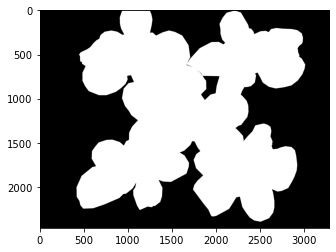

In [35]:
plt.imshow(mask, cmap='gray')

In [23]:
plt.imsave('./test.png', mask)

In [24]:
img = plt.imread('./test.png')

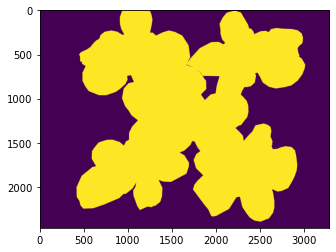

In [33]:
plt.imshow(img, cmap='Greys')

In [26]:
img.shape

(2464, 3280, 4)

In [30]:
df

,0,1,2,3,4,5,6,7,8,9,...,3270,3271,3272,3273,3274,3275,3276,3277,3278,3279
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2459,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2460,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2461,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
cv2.imwrite("GrayScale.png", mask)

True

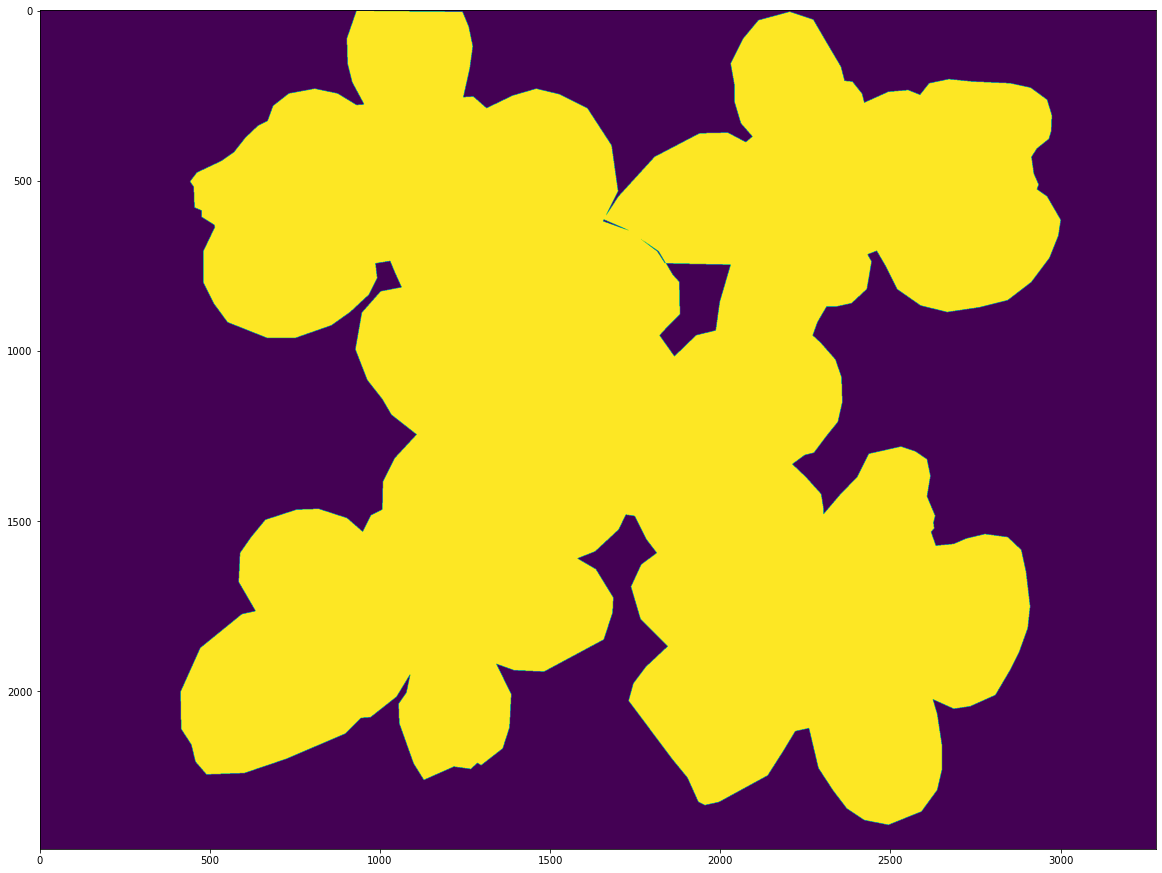

In [54]:
temp = plt.imread('./GrayScale.png')
plt.figure(figsize=(20,20))
plt.imshow(temp)
plt.show()

In [55]:
temp.shape

(2464, 3280)

In [56]:
temp

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [57]:
type(temp)

numpy.ndarray

In [61]:
a = np.array([False, True, False]) 
print(a.dtype)

bool


In [62]:
a.astype(np.float32)

array([0., 1., 0.], dtype=float32)

In [69]:
import glob

In [71]:
source_folder = os.path.join(os.getcwd(), "masks")
mask_folder_list = os.listdir(source_folder)
glob.glob(source_folder+'/*.png')

['/home/lab04/jupyter_home/AI_proj_Team2/data/masks/CASE71_03.png',
 '/home/lab04/jupyter_home/AI_proj_Team2/data/masks/CASE01_07.png',
 '/home/lab04/jupyter_home/AI_proj_Team2/data/masks/CASE74_15.png',
 '/home/lab04/jupyter_home/AI_proj_Team2/data/masks/CASE71_30.png',
 '/home/lab04/jupyter_home/AI_proj_Team2/data/masks/CASE73_18.png',
 '/home/lab04/jupyter_home/AI_proj_Team2/data/masks/CASE02_04.png',
 '/home/lab04/jupyter_home/AI_proj_Team2/data/masks/CASE71_22.png',
 '/home/lab04/jupyter_home/AI_proj_Team2/data/masks/CASE73_02.png',
 '/home/lab04/jupyter_home/AI_proj_Team2/data/masks/CASE71_32.png',
 '/home/lab04/jupyter_home/AI_proj_Team2/data/masks/CASE74_13.png',
 '/home/lab04/jupyter_home/AI_proj_Team2/data/masks/CASE71_19.png',
 '/home/lab04/jupyter_home/AI_proj_Team2/data/masks/CASE74_11.png',
 '/home/lab04/jupyter_home/AI_proj_Team2/data/masks/CASE71_07.png',
 '/home/lab04/jupyter_home/AI_proj_Team2/data/masks/CASE31_07.png',
 '/home/lab04/jupyter_home/AI_proj_Team2/data/ma

In [72]:
os.path.isdir()

<function genericpath.isdir(s)>

In [78]:
list(filter(os.path.isdir, glob.glob('./masks/*')))

['./masks/CASE71_05']

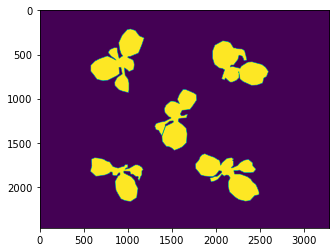

In [11]:
import matplotlib.pyplot as plt

img = plt.imread('./masks/CASE01_01.png')
plt.imshow(img)
plt.show()

In [12]:
import numpy as np
len(np.unique(img))

2

In [13]:
type(img)

numpy.ndarray

In [14]:
img.shape

(2464, 3280)